In [1]:
import pickle
from matplotlib import pyplot as plt
import os
import numpy as np
from PIL import Image
import random
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf

epochs = 10

# load the history file using pickle
with open(f'history_{epochs}_epochs.pkl', 'rb') as f:
    history = pickle.load(f)

In [2]:

# define function to preprocess image
DATA_PATH = './data/val_images/'

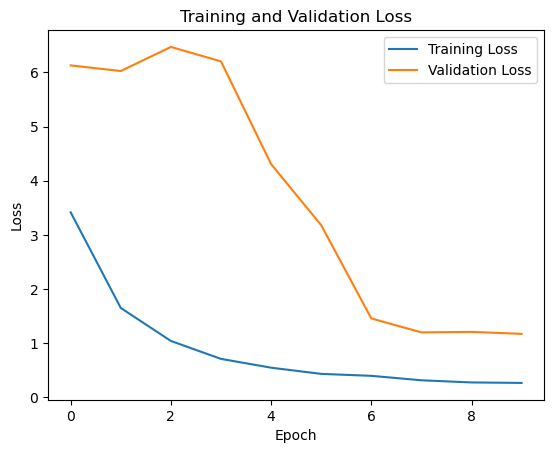

In [3]:
# plot training and validation loss
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

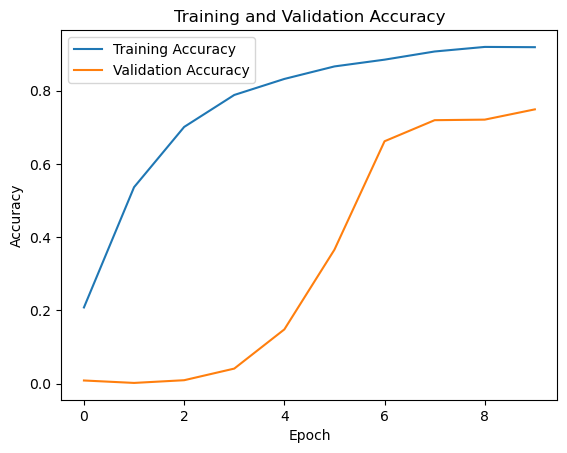

In [4]:
# plot training and validation loss
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [5]:
model = tf.keras.models.load_model(f'resnet50_model_{epochs}_epochs.h5')
#model.summary()

['Bulbasaur', 'Flareon', 'MrMime', 'Jigglypuff', 'Poliwrath', 'Scyther', 'Farfetchd', 'Psyduck', 'Rapidash']
1/1 [==============================] - 0s 261ms/step
['Bulbasaur', 'Eevee', 'MrMime', 'Jigglypuff', 'Poliwrath', 'Scyther', 'Farfetchd', 'Psyduck', 'Ponyta']


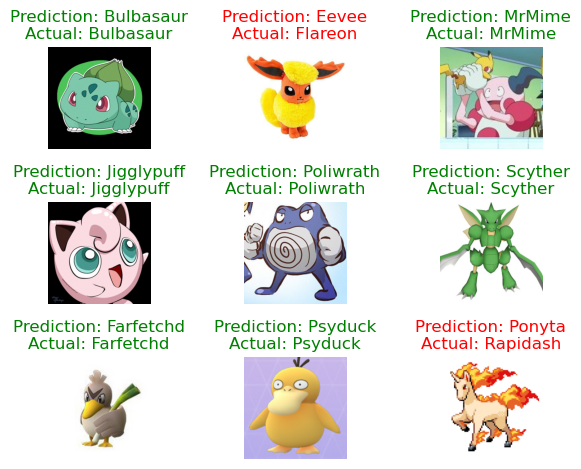

In [9]:
TEST_IMGS = './res/X_test_img/'
all_pokemon = os.listdir(TEST_IMGS)
random_pokemon = random.sample(all_pokemon, 9)
print(random_pokemon)
images = np.empty((9,256,256,3), dtype='uint8')
for i, pokemon in enumerate(random_pokemon):
    pokemon_imgs = os.listdir(TEST_IMGS + pokemon)
    random_img = random.sample(pokemon_imgs, 1)
    random_img = Image.open(TEST_IMGS + pokemon + '/' + random_img[0])
    random_img = random_img.convert('RGB')
    random_img = random_img.resize((256,256))
    random_img = np.array(random_img, dtype='uint8')
    images[i] = random_img

images = images / 255.0

predicted_idx = [np.argmax(p) for p in model.predict(images)]
predicted_labels = [all_pokemon[idx] for idx in predicted_idx]
actual_labels = random_pokemon
print(predicted_labels)
fig, ax = plt.subplots(3, 3)
ax = ax.flatten()
for i, image in enumerate(images):
    ax[i].imshow(images[i])
    color = 'black'
    if predicted_labels[i] == actual_labels[i]:
        color = 'green'
    else:
        color = 'red'
    ax[i].set_title(f'Prediction: {predicted_labels[i]}\nActual: {actual_labels[i]}', color=color)
    ax[i].axis('off')
plt.tight_layout()
plt.show()


In [7]:
"""TODO: ADD EVALUATION"""

'TODO: ADD EVALUATION'